# Image Representation & Classification

## Image Representation as numerical data

In [1]:
import numpy as np
import matplotlib.image as mpimg  # for reading in images

import matplotlib.pyplot as plt
import cv2  # computer vision library

%matplotlib inline

Image dimensions: (427, 640, 3)


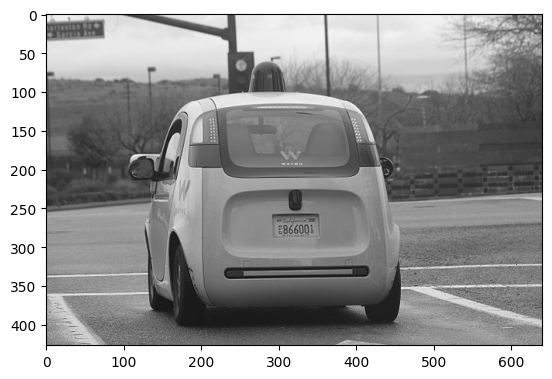

In [2]:
# Read in the image
image = mpimg.imread('images/waymo_car.jpg')

# Print out the image dimensions
print('Image dimensions:', image.shape)

# Change from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap='gray')

In [3]:
# Prints specific grayscale pixel values
# What is the pixel value at x = 400 and y = 300 (on the body of the car)?

x = 400
y = 300

print(gray_image[y,x])

159


In [4]:
# Finds the maximum and minimum grayscale values in this image

max_val = np.amax(gray_image)
min_val = np.amin(gray_image)

print('Max: ', max_val)
print('Min: ', min_val)

Max:  255
Min:  2


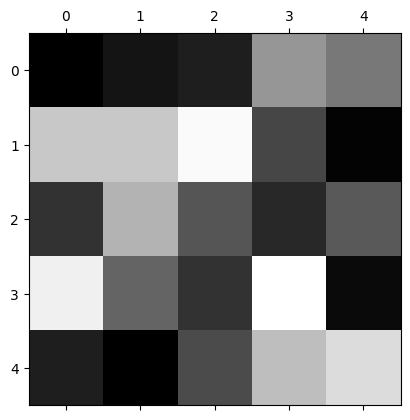

In [5]:
# Create a 5x5 image using just grayscale, numerical values
tiny_image = np.array([[0, 20, 30, 150, 120],
                      [200, 200, 250, 70, 3],
                      [50, 180, 85, 40, 90],
                      [240, 100, 50, 255, 10],
                      [30, 0, 75, 190, 220]])

# To show the pixel grid, use matshow
plt.matshow(tiny_image, cmap='gray')

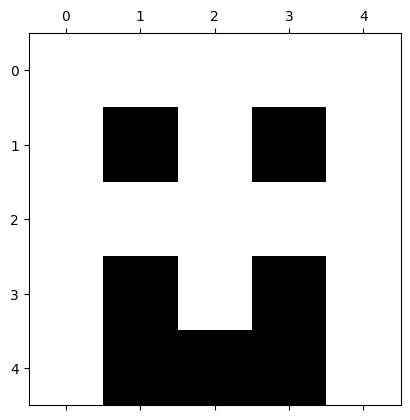

In [6]:
tiny_smile = np.array([[150, 150,150, 150, 150], 
                       [150, 0, 150, 0, 150], 
                       [150, 150, 150, 150, 150], 
                       [150, 0, 150, 0, 150], 
                       [150, 0, 0, 0, 150]])

plt.matshow(tiny_smile, cmap='gray')

### Visualizing RGB Channels

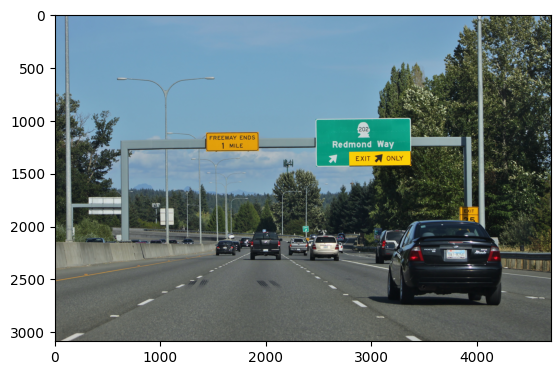

In [7]:
# Read in the image
image = mpimg.imread('images/wa_state_highway.jpg')

plt.imshow(image)

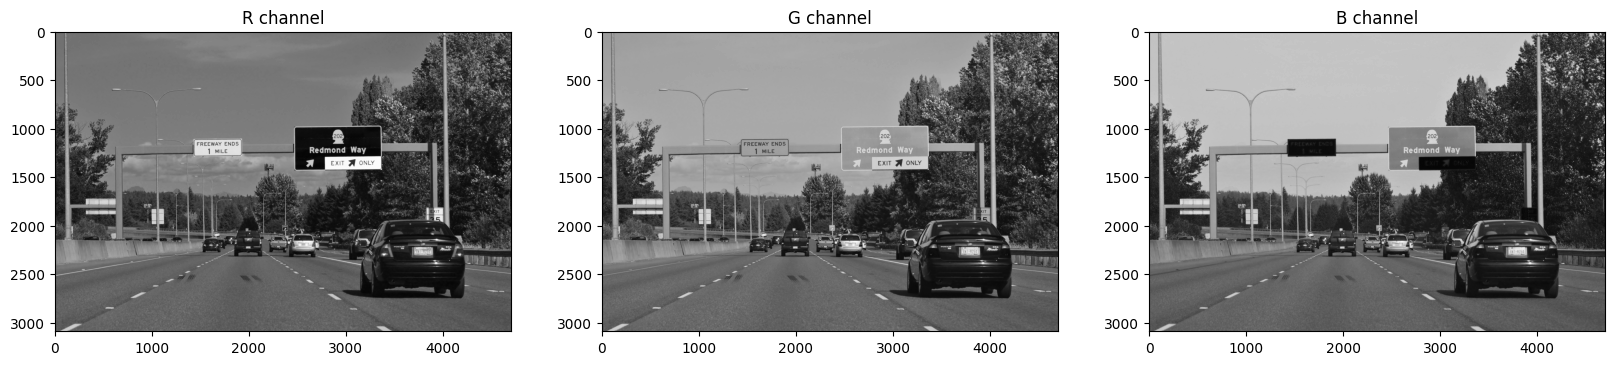

In [8]:
# Isolate RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

### Color Threshold, Blue Color

In [9]:
# Read in the image
image = cv2.imread('images/pizza_bluescreen.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)

This image is: <class 'numpy.ndarray'>  with dimensions: (514, 816, 3)


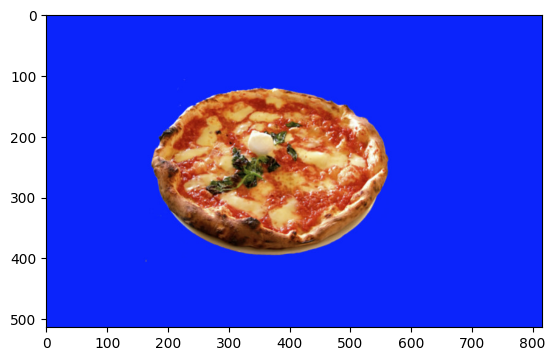

In [10]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

In [11]:
#Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background
lower_blue = np.array([0,0,200]) 
upper_blue = np.array([250,250,255])

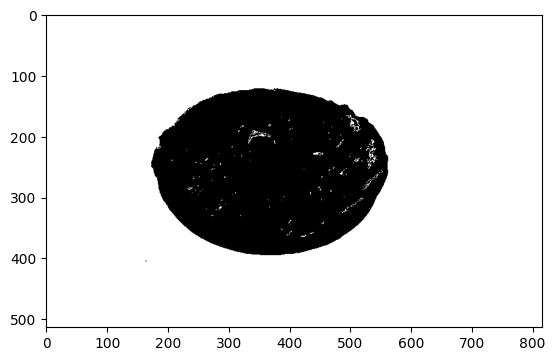

In [12]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

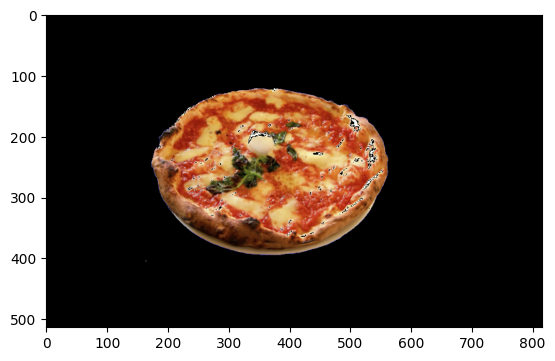

In [13]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

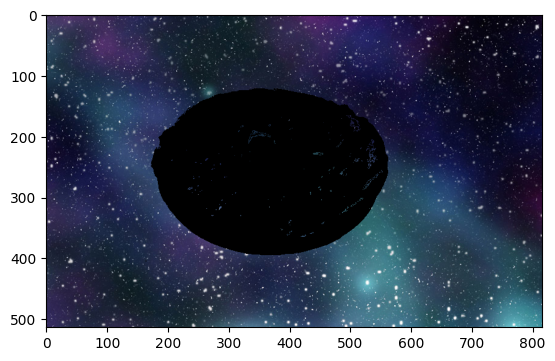

In [14]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
crop_background = background_image[0:514, 0:816]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

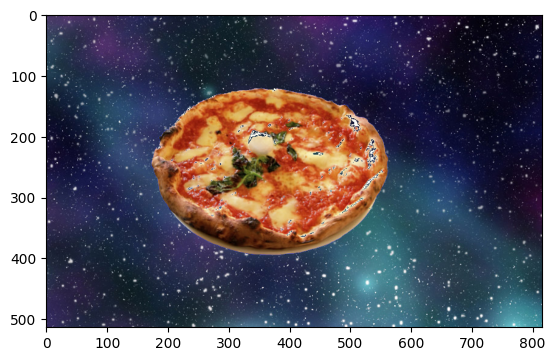

In [15]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)

### Color Threshold, Green Color

In [16]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)

Image dimensions: (450, 660, 3)


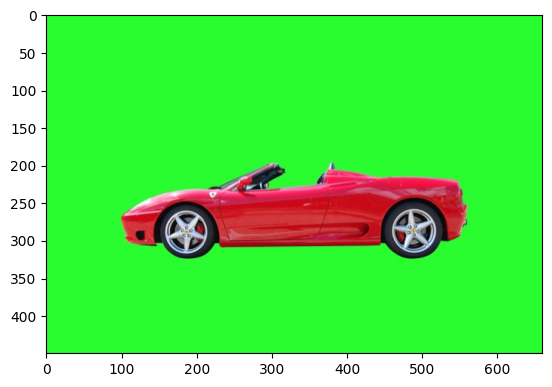

In [17]:
# Display the image
plt.imshow(image)

In [20]:
# Define our color selection boundaries in RGB values
lower_green = np.array([0,240,0])
upper_green = np.array([255,255,255])

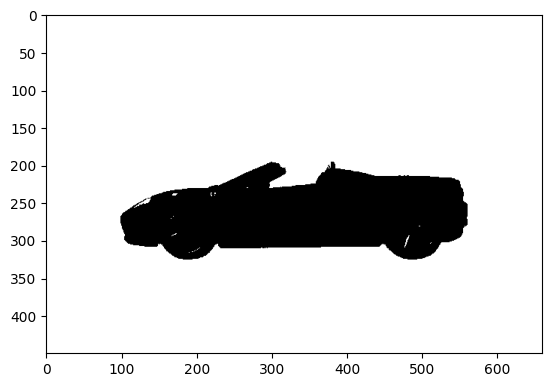

In [21]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

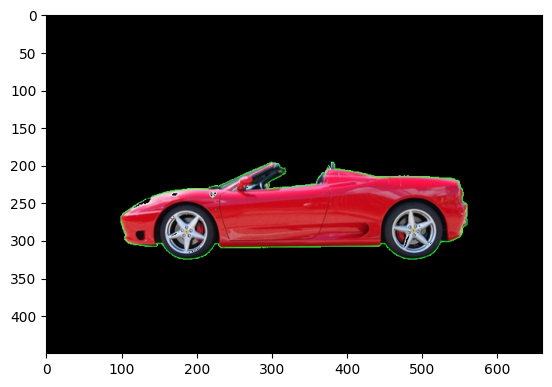

In [22]:
# Mask the image to let the car show through
masked_image = np.copy(image)
masked_image[mask != 0] = [0, 0, 0]
# Display it!
plt.imshow(masked_image)

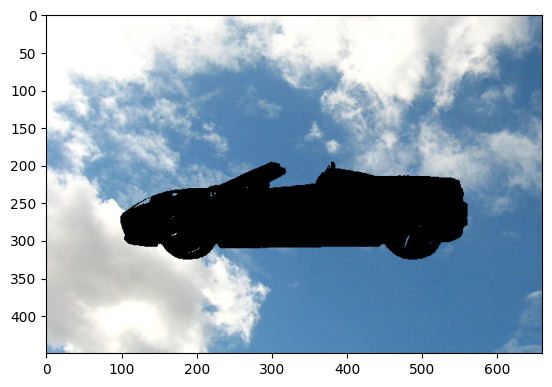

In [23]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/sky.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
# Crop it or resize the background to be the right size (450x660)
crop_background = background_image[0:450, 0:660]
crop_background = crop_background.copy()
# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]
# Display the background and make sure 
plt.imshow(crop_background)

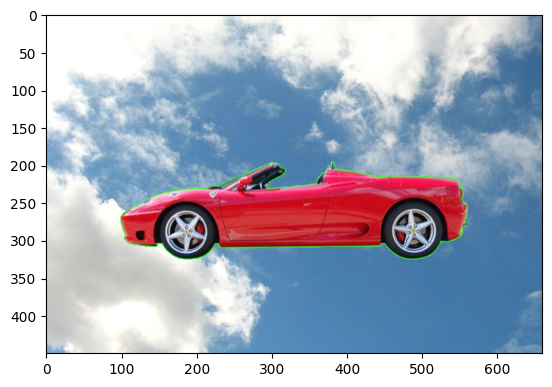

In [24]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background
# Display the result
plt.imshow(complete_image)

### Color Conversion

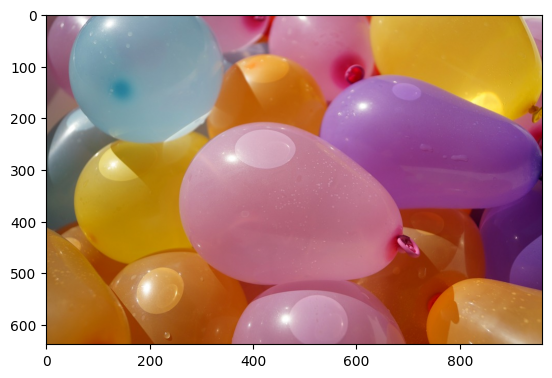

In [25]:
# Read in the image
image = cv2.imread('images/water_balloons.jpg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

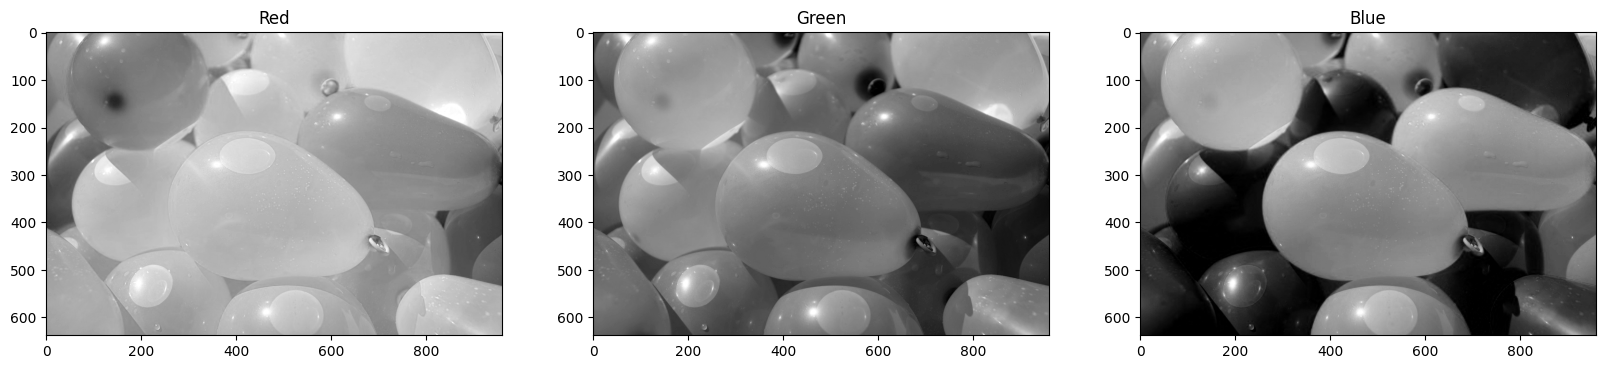

In [26]:
# Plot RGB Channels
# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

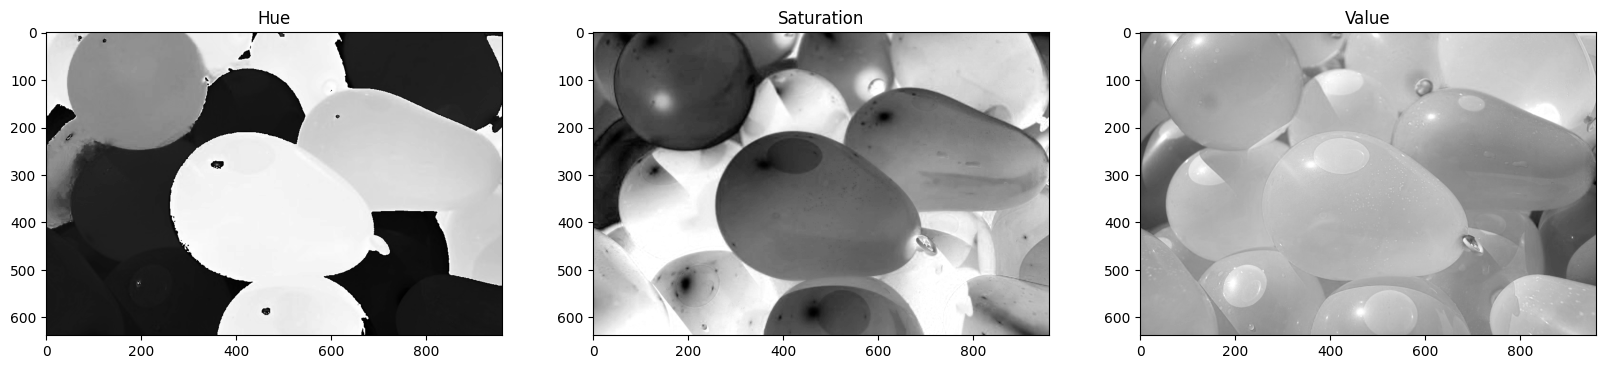

In [27]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

In [28]:
# Define pink color selection criteria in HSV values
lower_hue = np.array([160,0,0]) 
upper_hue = np.array([180,255,255])

In [29]:
# Define pink color selection criteria in RGB values
lower_pink = np.array([180,0,100]) 
upper_pink = np.array([255,255,230])

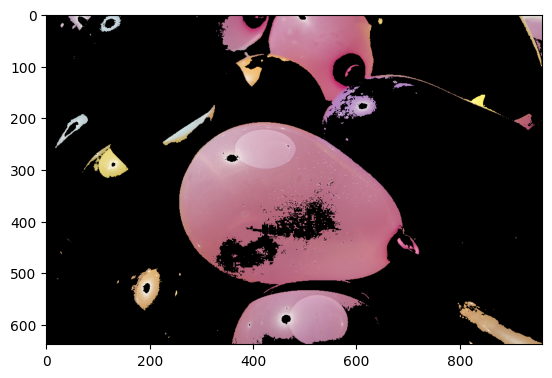

In [30]:
# Define the masked area in RGB space
mask_rgb = cv2.inRange(image, lower_pink, upper_pink)

# mask the image
masked_image = np.copy(image)
masked_image[mask_rgb==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

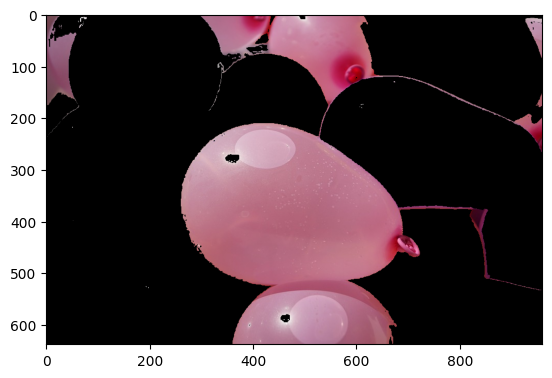

In [31]:
# Define the masked area in HSV space
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image = np.copy(image)
masked_image[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

## Building Image Classifier